In [12]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

In [3]:
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_size,device):
    img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
    #raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')   
    raw_image = Image.open('0.png').convert('RGB')

    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))
    
    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ]) 
    image = transform(raw_image).unsqueeze(0).to(device)   
    return image

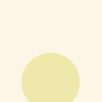

reshape position embedding from 196 to 576
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth
caption: a yellow circle on a white background


In [6]:
from models.blip import blip_decoder

image_size = 384
image = load_demo_image(image_size=image_size, device=device)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth'
    
model = blip_decoder(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

with torch.no_grad():
    # beam search
    caption = model.generate(image, sample=False, num_beams=3, max_length=20, min_length=5) 
    # nucleus sampling
    # caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5) 
    print('caption: '+caption[0])

## generated a class for ease in use

In [26]:
from PIL import Image
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
from models.blip import blip_decoder


class blip_caption():
    def __init__(self, device = 'cuda', 
                 model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth',
                 image_size = 384):
        self.device = device
        self.model_url = model_url
        self.model = blip_decoder(pretrained=model_url, image_size=image_size, vit='base').eval()
        self.model = self.model.to(self.device)
        self.image_size = image_size

    def __image_transform(self, image):
        raw_image = Image.open(image).convert('RGB')
        w,h = raw_image.size
        transform = transforms.Compose([
            transforms.Resize((self.image_size,self.image_size),interpolation=InterpolationMode.BICUBIC),
            transforms.ToTensor(),
            transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
            ]) 
        image = transform(raw_image).unsqueeze(0).to(self.device)   
        return image
    
    def generate_caption(self, image_path):
        image = self.__image_transform(image_path)
        with torch.no_grad():
            caption = self.model.generate(image, sample=False, num_beams=3, max_length=20, min_length=5)
            return caption[0]



In [27]:
caption_model_instance = blip_caption()

reshape position embedding from 196 to 576
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth


In [28]:

image_path = '0.png'
caption_model_instance.generate_caption(image_path=image_path)

'a yellow circle on a white background'